# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 1

**Правила:**

* Выполненную работу нужно отправить телеграм-боту, адрес которого будет указан на странице курса до конца недели. Обращаем ваше внимание, что в боте необходимо заранее зарегистрироваться и дождаться подтверждения.
* Дедлайн **17 февраля в 18:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.

-----

In [91]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

%matplotlib inline

Для выполнения задания вы можете установить свою палитру цветов при отрисовке графиков с помощью кода ниже. Если введете несуществующее имя, то вам напечатается список возможных палитр. Также вы можете устанавливать свои цвета конкретным объектам на графиках, обычно это делается с помощью аргумента `color`.

In [92]:
sns.set_palette("hls", 10)

### Задача 1

Для выполнения задания выберите любой профиль, в течении 1-2 недель его можно поменять. Студенты кафедры инновационная педагогика выполняют задание по профилю педагогика.

**Профиль биология**

Скачайте <a href="https://www.kaggle.com/ruslankl/mice-protein-expression
">датасет</a> с данными об экспрессии белков у белых мышей. Данный датасет состоит из таблицы значений уровней экспрессии 77 различных белков в мозге у мышей. Каждая строка соответствует одной особи, каждый столбец соответствует одному белку. На столбцы Genotype, Treatment и подобные пока не обращаем внимания. 

Для исследования рекомендуется выбрать столбцы 'ITSN1_N', 'DYRK1A_N', 'pBRAF_N', 'pCREB_N', но можно взять и другие.

**Профиль физика**

Скачайте <a href="https://www.kaggle.com/fedesoriano/cern-electron-collision-data
">датасет</a> с данными о столкновении электронов на Большом Адронном Коллайдере. 

Данный датасет  содержит информацию о событиях столкновения двух электронов. Он состоит из таблицы различных параметров столкновений. Каждая строка соответствует одному столкновению, каждый столбец соответствует одному параметру. Например, в столбцах E1, E2 записаны значения энергии сталкивающихся электронов, в столбцах px1, py1, pz1, px2, py2, pz2 — значения моментов импульса, в столбцах Q1, Q2 $-$ заряды электронов.

Для исследования рекомендуется выбрать столбцы 'E2', 'px2', 'eta2', 'phi2'. Все эти столбцы — некоторые параметры второго электрона. Можно взять и другие столбцы.

**Профиль педагогика**

Скачайте <a href="https://www.kaggle.com/spscientist/students-performance-in-exams
">датасет</a> с данными о результатах учащихся на экзаменах.

Данный датасет состоит из таблицы баллов учащихся на экзаменах по математике, чтению и письму, а также дополнительной информации о студентах. Каждая строка соответствует одному учащемуся, каждый столбец соответствует одному признаку. В столбцах math score, reading score и writing score записаны баллы за экзамены.

Для исследования возьмите столбцы 'math score', 'reading score', 'writing score'.

----

Чтобы скачать данные, зарегистрируйтесь на сайте, после нажмите download на странице датасета и распакуйте скачанный архив. Вы получите файл формата `csv`.

Если вы работаете в Google Colab, можно загрузить полученный файл в разделе "Файлы" (значок папки) на левой панели.

In [93]:
# эта функция читает данные, в кавычках укажите путь к файлу на вашем компьютере или в Colab
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Рабочий стол\\Матстаты\\Data_Cortex_Nuclear.csv")
#df = pd.read_csv("./dielectron.csv")
#df = pd.read_csv("./StudentsPerformance.csv")

Посмотрим на первые строки этой таблицы.

In [94]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Выберите несколько (3-6) столбцов для анализа значений в них.

In [95]:
# укажите столбцы данных 
# Пример: columns = ['math score', ...]
columns = ['ITSN1_N', 'DYRK1A_N', 'pBRAF_N', 'pCREB_N']

df_chosen_columns = df[columns]

#Одномерный массив значений одного признака (например, 'math score') можно получить так:
#df_chosen_columns['math score']

df_chosen_columns_ITSN1_N = df_chosen_columns['ITSN1_N']

df_chosen_columns_ITSN1_N 

0       0.747193
1       0.689064
2       0.730247
3       0.617076
4       0.617430
          ...   
1075    0.463591
1076    0.474163
1077    0.395179
1078    0.412894
1079    0.461059
Name: ITSN1_N, Length: 1080, dtype: float64

#### Гистограммы

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией `matplotlib.pyplot.hist`.

*Примечание.* В анализе данных обычно используется слово "признак" для обозначения исследуемого свойства объекта. Например, для биологического датасета признаком является белок.


C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


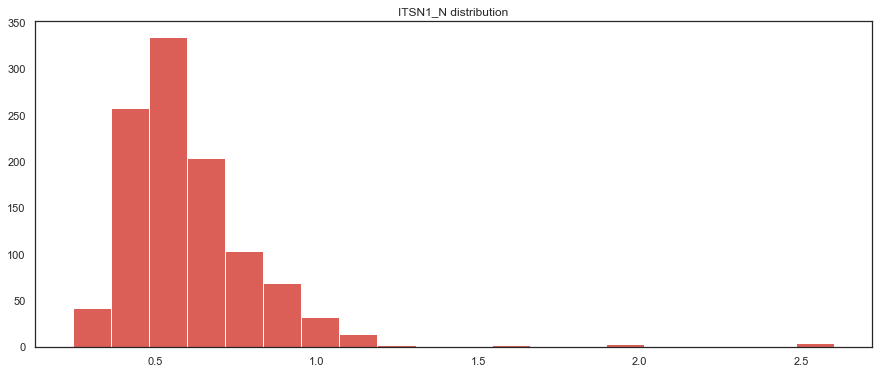

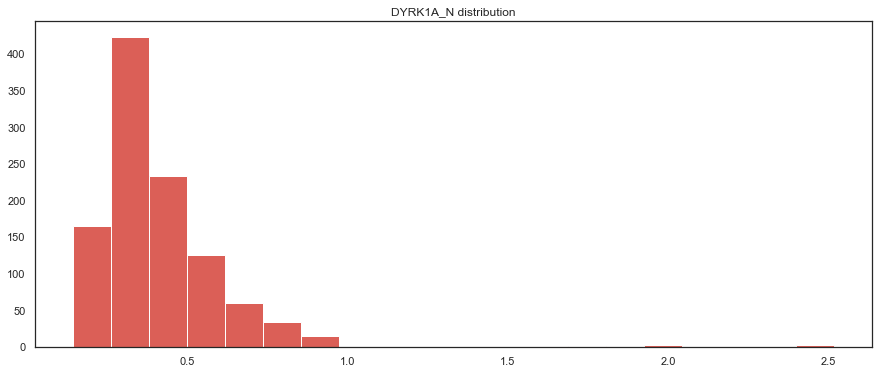

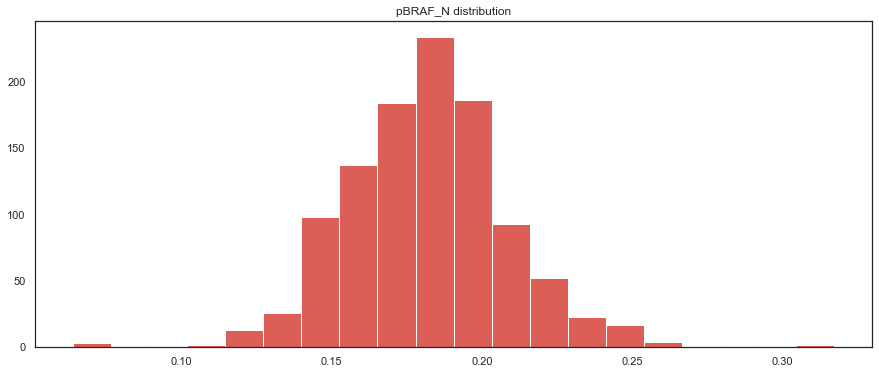

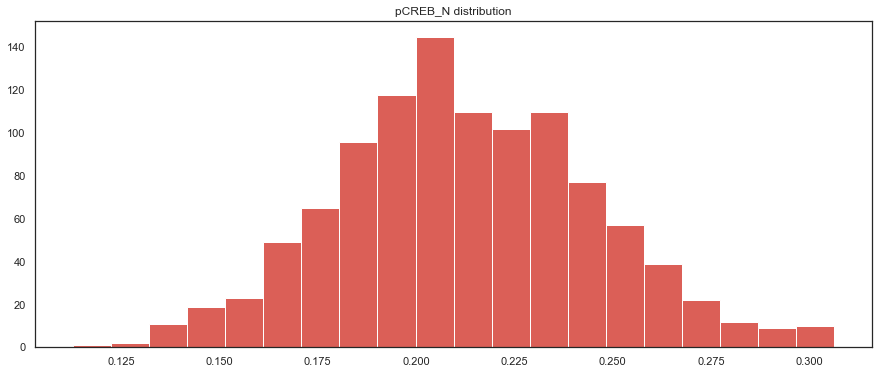

In [96]:
for i, column in enumerate(columns):
    plt.figure(figsize=(15, 6))
    
    plt.hist(df_chosen_columns[column], bins=20)
   
    plt.title(column + ' distribution');

Выбросы — значения, которые сильно отличаются от большинства значений выборки. Они могут возникать из-за ошибки измерения, из-за необычной природы входных данных, но также могут быть и частью распределения.

По гистограммам предположите, в каких из исследуемых признаков могут быть выбросы?

В 'ITSN1_N' и 'pBRAF_N'

**Ответ:** В 'ITSN1_N' и 'pBRAF_N'

Выбросы могут сильно портить внешний вид графика.

Продемонстрируем это на примере. Сгенерируем выборку размера 1000 из стандартного нормального распределения и построим по ней гистограмму. В библиотеке `scipy` это можно сделать с помощью метода `rvs`

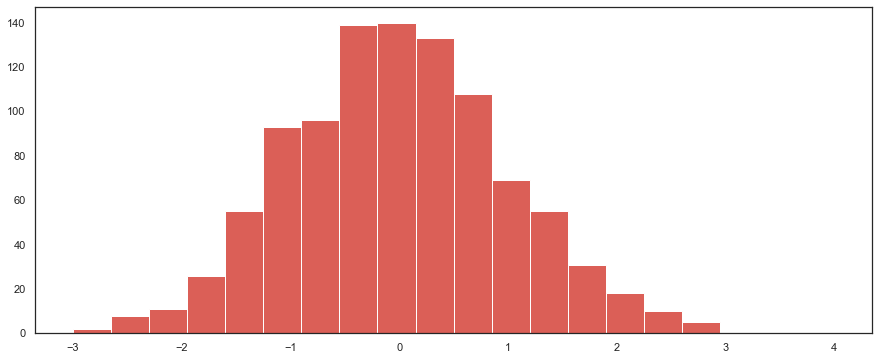

In [97]:
sample = sps.norm.rvs(size=1000)

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Как видим, большая часть значений находятся в промежутке от -3 до 3.

Теперь добавим выброс — очень большое значение, которое могло появиться, например, в результате ошибок измерения. Допустим, что выброс — первое измерение.

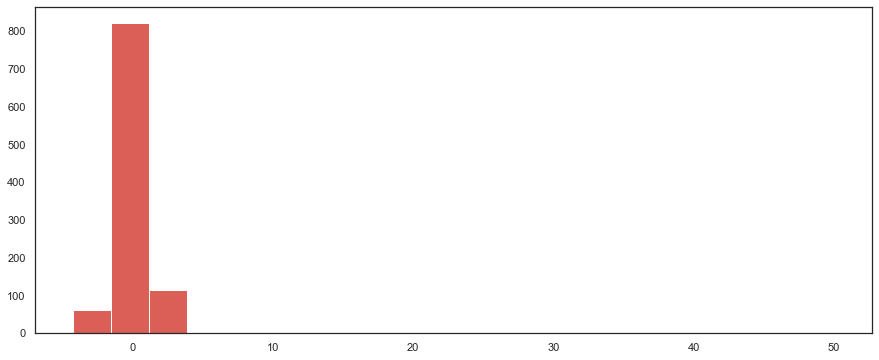

In [98]:
outlier = 50
sample[0] = outlier

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20);

По такому графику уже нельзя сделать предположение о распределении выборки.
Также обратите внимание, что большая часть графика пустая, что говорит о неинформативности данного графика.

Эту проблему с графиками можно решить с помощью параметра `range`, который определяет, в каких границах строится гистограмма.

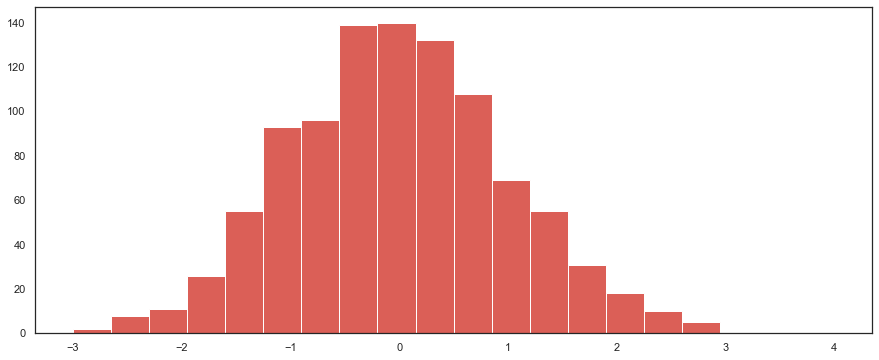

In [99]:
plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Проделайте то же самое с теми столбцам, в которых, как вы считаете, есть выбросы.

В словаре `ranges_without_outliers` укажите, в каких пределах, по вашему мнению, стоит нарисовать гистограмму распределения для каждого признака.

(array([  6.,  17.,  64.,  91., 142., 126., 138., 106.,  84.,  74.,  54.,
         34.,  35.,  23.,  21.,  13.,  13.,  11.,   5.,   1.]),
 array([0.25  , 0.2975, 0.345 , 0.3925, 0.44  , 0.4875, 0.535 , 0.5825,
        0.63  , 0.6775, 0.725 , 0.7725, 0.82  , 0.8675, 0.915 , 0.9625,
        1.01  , 1.0575, 1.105 , 1.1525, 1.2   ]),
 <a list of 20 Patch objects>)

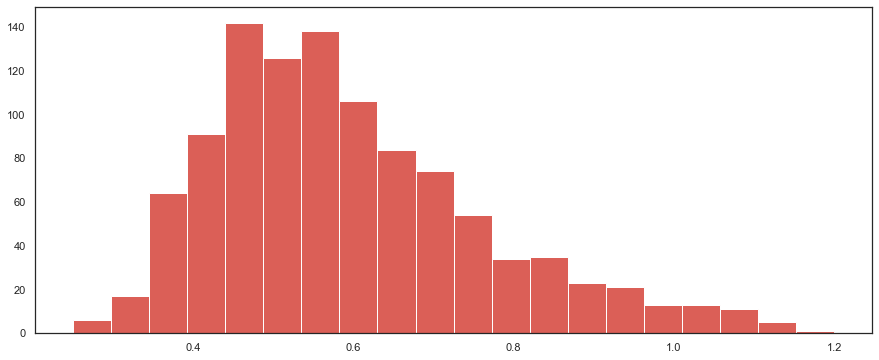

In [100]:
plt.figure(figsize=(15, 6))
    
plt.hist(df_chosen_columns['ITSN1_N'], bins=20, range = (0.25, 1.2))

(array([  6.,  14.,  34.,  52.,  54.,  74.,  73.,  87., 111., 112., 114.,
         98.,  66.,  50.,  25.,  32.,  17.,   8.,  13.,   7.]),
 array([0.125  , 0.13125, 0.1375 , 0.14375, 0.15   , 0.15625, 0.1625 ,
        0.16875, 0.175  , 0.18125, 0.1875 , 0.19375, 0.2    , 0.20625,
        0.2125 , 0.21875, 0.225  , 0.23125, 0.2375 , 0.24375, 0.25   ]),
 <a list of 20 Patch objects>)

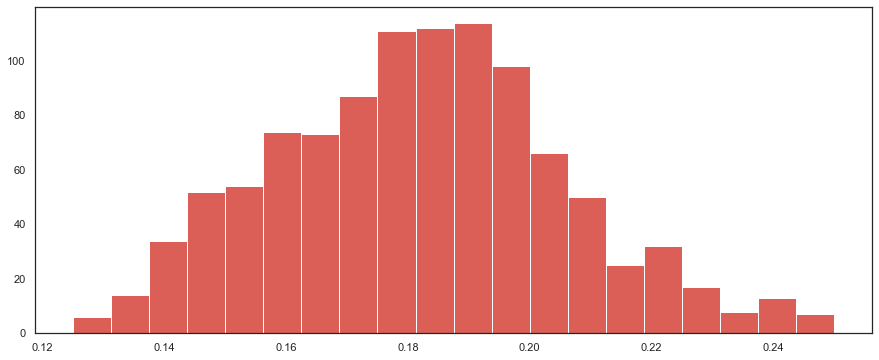

In [101]:
plt.figure(figsize=(15, 6))
    
plt.hist(df_chosen_columns['pBRAF_N'], bins=20, range = (0.125, 0.25))

Пример заполнения словаря на ячейке ниже. 

Здесь мы считаем, что для признака `column1` большая часть значений находится в промежутке от -1 до 5, а все значения за пределами этого промежутка — выбросы.
Мы хотим нарисовать информативный график для гистограммы значений признака `column1`, поэтому гистограмму будем строить только на основе значений из промежутка (-1, 5)

Аналогично для признака `column2`

Аналогично определите интервалы для исследуемых признаков

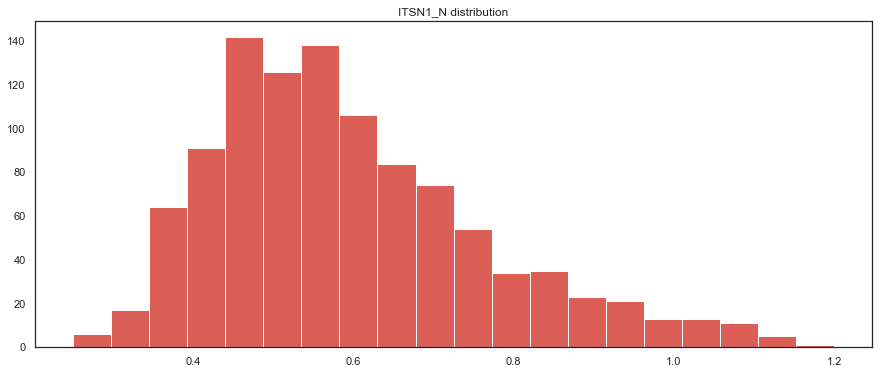

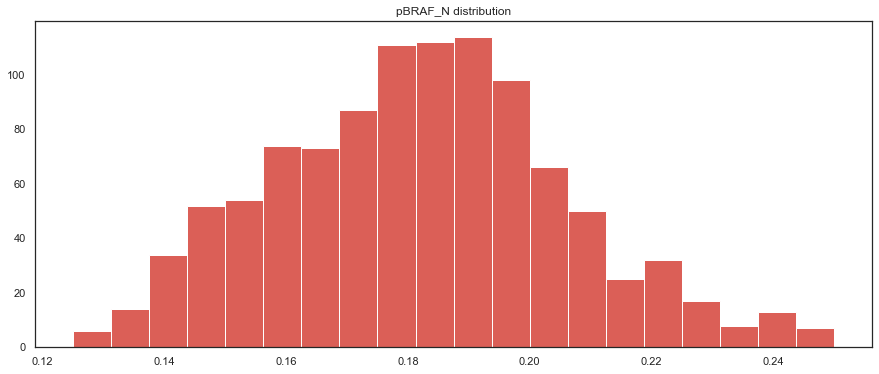

In [102]:
ranges_without_outliers = {
    'ITSN1_N' : (0.25, 1.2), # для 'ITSN1_N'
    'pBRAF_N' : (0.125, 0.25) # для 'pBRAF_N
}

for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(df_chosen_columns[column], range=column_range, bins=20)
    plt.title(column + ' distribution')

**Сделайте выводы** 

Изменилась ли форма распределений, стали ли графики информативнее?

**Ответ:** Видно, что стало меньше пустых участков графика, более наглядно распределение выглядит

#### Ядерные оценки плотности

Иногда гистограммы недостаточно, чтобы понять, какое у распределение у элементов выборки. В таких случаях можно использовать ядерные оценки плотности. 

В библиотеке `seaborn` они представлены функциями `distplot` (в версиях до `0.11.1`), `kdeplot` (начиная с версии `0.11.1`)

In [103]:
sns.__version__

'0.10.1'

Пример для нормального распределения с выбросом.

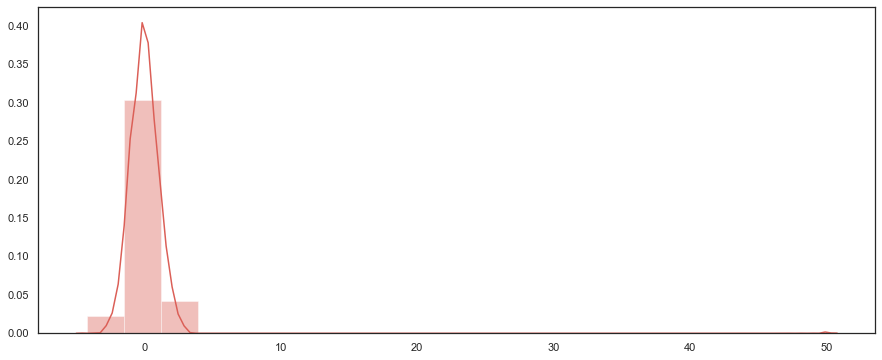

In [104]:
plt.figure(figsize=(15, 6))
sns.distplot(sample, bins=20);

Видно, что, даже несмотря на "хвост", плотность основной части данных довольно похожа на плотность нормального распределения. Теперь нарисуем этот же график для выборки без выброса.

Для наглядности на этом же графике нарисуем плотность стандартного нормального распределения. В библиотеке `scipy` плотность распределения называется `pdf`.

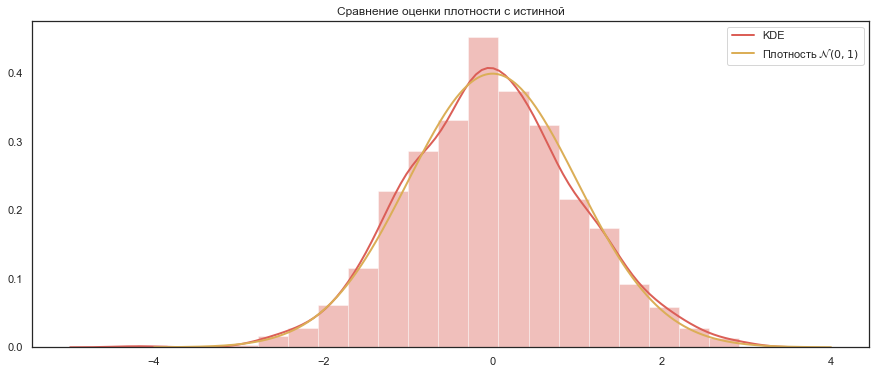

In [105]:
# уберем выброс
sample_wo_ourliers = sample[1:]

# сетка от -4 до 4 из 1000 значений
grid = np.linspace(-4, 4, 1000)
grid
# считаем значения функции в выборке
norm_pdf_values = sps.norm.pdf(grid)

# отрисовка графика
plt.figure(figsize=(15, 6))
sns.distplot(sample_wo_ourliers, bins=20, kde_kws={"label": "KDE", "linewidth": 2})
plt.plot(grid, norm_pdf_values, label='Плотность $\\mathcal{N}(0,1)$', lw=2)
plt.title('Сравнение оценки плотности с истинной')
plt.legend();

Однако ядерные оценки плотности тоже не универсальны.
Рассмотрим пример экспоненциального распределения.

Сгенерируйте выборку размера 100 из экспоненциального распределения $\textit{Exp(1)}$. Для этого воспользуйтесь функцией `sps.expon.rvs`.

In [106]:
ex_sample = sps.expon.rvs(size=100)
ex_sample

array([0.29163433, 0.19808522, 0.1191488 , 7.09057783, 0.15344659,
       1.75775711, 0.29630877, 0.51636349, 0.50534976, 2.36594272,
       3.69069578, 0.03083409, 0.53775806, 1.54753105, 0.14042258,
       2.50471581, 2.46526253, 0.84557849, 0.11063915, 1.34612651,
       1.01112237, 0.4256857 , 1.16593985, 0.21281077, 2.20433751,
       1.05630376, 0.05917873, 4.29745044, 0.42648714, 1.99960325,
       1.03389889, 0.93374519, 2.16007078, 0.48944992, 0.82055778,
       1.78336974, 0.58339754, 6.19522759, 0.04386279, 1.27714898,
       0.35023781, 0.16092034, 0.0137739 , 0.59264118, 1.53680265,
       1.13651091, 0.14526249, 1.42252194, 0.1974985 , 0.8118072 ,
       0.44616445, 1.06788097, 0.76158008, 0.55978204, 1.19763329,
       0.43023376, 0.6071861 , 0.78394878, 0.55151684, 0.3818605 ,
       0.12210928, 1.1630447 , 0.67459787, 0.45737161, 0.693916  ,
       0.27113325, 2.13586124, 0.78630817, 0.24206339, 0.45184265,
       0.43466731, 0.74532731, 0.06229802, 2.20534586, 0.12791

Посчитайте значения плотности этого распределения на промежутке от 0 до 6.

In [107]:
grid1 = np.linspace(0, 6, 100)
expon_pdf_values = sps.expon.pdf(grid1)
expon_pdf_values

array([1.        , 0.94119394, 0.88584603, 0.83375292, 0.78472319,
       0.73857671, 0.69514393, 0.65426525, 0.61579049, 0.57957828,
       0.54549556, 0.51341712, 0.48322508, 0.45480852, 0.42806302,
       0.40289032, 0.37919793, 0.35689879, 0.33591098, 0.31615738,
       0.29756541, 0.28006676, 0.26359714, 0.24809603, 0.23350648,
       0.21977488, 0.20685079, 0.19468671, 0.18323795, 0.17246245,
       0.16232061, 0.15277518, 0.14379107, 0.13533528, 0.12737675,
       0.11988622, 0.11283619, 0.10620074, 0.09995549, 0.0940775 ,
       0.08854517, 0.08333818, 0.07843739, 0.0738248 , 0.06948345,
       0.0653974 , 0.06155164, 0.05793203, 0.05452528, 0.05131886,
       0.048301  , 0.04546061, 0.04278725, 0.0402711 , 0.03790291,
       0.03567399, 0.03357615, 0.03160167, 0.0297433 , 0.02799421,
       0.02634798, 0.02479856, 0.02334025, 0.02196771, 0.02067587,
       0.01946001, 0.01831564, 0.01723857, 0.01622484, 0.01527072,
       0.01437271, 0.0135275 , 0.01273201, 0.01198329, 0.01127

Нарисуйте гистограмму и ядерную оценку плотности для выборки из сгененированного экспоненциального распределения.

Text(0.5, 1.0, 'expon. distribution')

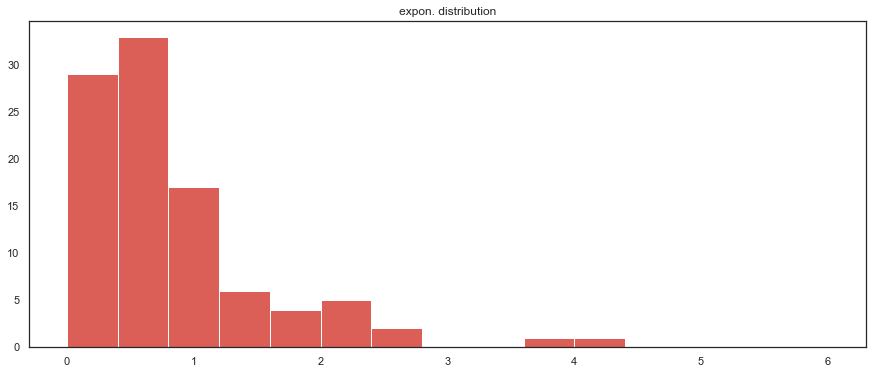

In [108]:
#Hist
plt.figure(figsize=(15, 6))
plt.hist(ex_sample, range = (0,6), bins=15)
plt.title('expon. distribution')

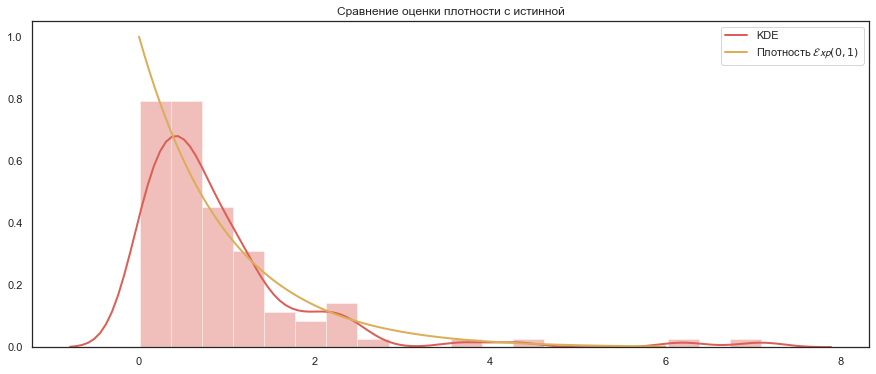

In [109]:
#Ядерная оценка
plt.figure(figsize=(15, 6))
sns.distplot(ex_sample, bins=20, kde_kws={"label": "KDE", "linewidth": 2})
plt.plot(grid1, expon_pdf_values, label='Плотность $\\mathcal{Exp}(0,1)$', lw=2)
plt.title('Сравнение оценки плотности с истинной')
plt.legend();

Как вы думаете, почему ядерная оценка плотности так плохо приближает реальную плотность распределения?

**Ответ:** слишком чувствительна к самой гистограмме? 

Нарисуйте гистограммы и ядерные оценки плотности для исследуемых признаков

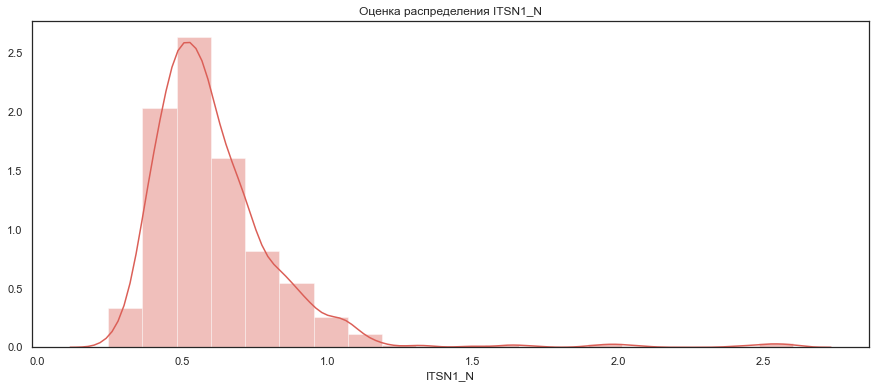

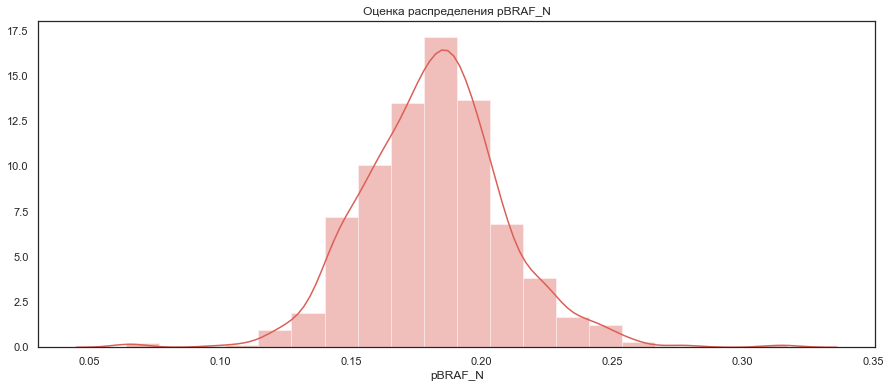

In [110]:
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    
    # для каждого признака оставьте значения внутри ранее заданного промежутка column_range
    #plt.hist(sps.norm.pdf(df_chosen_columns[column]), range=column_range, bins=20)
    
    sns.distplot(df_chosen_columns[column], bins=20);
    plt.title('Оценка распределения ' + column)

**Сделайте выводы.** Какой из двух видов графиков более нагляден для данных выборки? Какими свойствами должно обладать распределение признака, чтобы ядерная оценка плотности, полученная по выборке, была похожа на настоящую плотность? 

**Вывод:** Второй график более наглядный, тк меньше пустот.  Насколько я понимаю, наша оценка - аппроксимация того, что мы видим в гистограммах, поэтому мешать наглядности будут выбросы во-первых, а также столбцы, которые отличаются сильно от соседних, тк из-за "чувствительности" с ним, ядерная оценка будет в этом месте расходиться с ожидаемой плотностью

Здесь мы "избавились" от выбросов для того, чтобы понять, как распределена бОльшая часть выборки.

Но нужно понимать, что избавляться от выбросов при анализе данных стоит не всегда.
Прежде, чем удалять выбросы из выборки, хорошо бы понимать:
1. **Какая цель исследования**. Например, если мы хотим узнать, как хорошо "средний" студент МФТИ решает задачи по теории вероятностей, результаты лучших студентов на потоке не сильно проясняют ситуацию и затрудняют анализ. Такие результаты нужно выкинуть. Если же надо отобрать студентов на стажировку для аналитиков данных, хорошие результаты не только не нужно отсеивать, но и нужно анализировать дополнительно.
2. **Почему** отличающееся значение могло появиться в выборке. Это случайность / ошибка в измерениях / следствие какого-то еще фактора? Возможно, удаление отличающегося элемента лишит нас важных знаний о природе исследуемых данных.



**Приведите примеры исследований**, в которых нужно/не нужно удалять выбросы в данных:

Интересует средний рост мужчин в возрасте 20-25 например. Есть в выборке человек с ростом 230. Этот выброс (простите) нужно удалить)

Не стоит удалять, когда, например, эти выбросы интересуют нас как группа точек как раз в большей степени, чем основная часть выборки. Например, результаты ЕГЭ по России и интересует отбор школьников в МФТИ, нас интересует малая часть выборки, которая написала ЕГЭ подь 100 баллов.

**Сделайте выводы по всей задаче:**

Избавление от выбросов оправданно для лучшей визуализации всей выборки, однако вопрос удаления зависит от постановки задачи

### Задача 2

В этой задаче нужно визуализировать *центральную предельную теорему*.



*a).* Пусть $\xi_1, ..., \xi_n$ — независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$, где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. 

In [111]:
size = 300  # размер выборки
samples_count = 500 # количество выборок

sample = sps.expon.rvs(size = (samples_count, size))
sample

array([[4.60391027e-03, 5.48190364e-01, 1.73804725e+00, ...,
        2.37486591e+00, 1.49844282e+00, 1.02234036e-01],
       [7.05732463e-01, 1.79732647e+00, 1.05289183e+00, ...,
        3.88427940e-01, 1.40734651e-01, 1.72731253e-01],
       [7.34382060e-02, 2.00730307e-01, 4.10474774e-01, ...,
        1.29765016e+00, 5.75988446e-02, 3.68731647e-01],
       ...,
       [6.56230162e-01, 2.97609467e+00, 3.90826271e-01, ...,
        9.20073483e-01, 1.34227692e+00, 2.17715704e-01],
       [3.20842926e+00, 2.79953085e-01, 2.47180898e-01, ...,
        1.61669534e+00, 6.92265655e+00, 3.50684860e-01],
       [1.23203784e+00, 5.45986482e-01, 5.46902279e-01, ...,
        7.25220712e-02, 3.09651194e-01, 1.18672993e+00]])

По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. 

In [112]:
Xsums = sample.cumsum(axis = 1)
Xsums

array([[4.60391027e-03, 5.52794274e-01, 2.29084153e+00, ...,
        2.86852691e+02, 2.88351133e+02, 2.88453367e+02],
       [7.05732463e-01, 2.50305894e+00, 3.55595077e+00, ...,
        2.81299268e+02, 2.81440003e+02, 2.81612734e+02],
       [7.34382060e-02, 2.74168513e-01, 6.84643287e-01, ...,
        2.82076218e+02, 2.82133817e+02, 2.82502549e+02],
       ...,
       [6.56230162e-01, 3.63232483e+00, 4.02315110e+00, ...,
        3.22760636e+02, 3.24102913e+02, 3.24320628e+02],
       [3.20842926e+00, 3.48838234e+00, 3.73556324e+00, ...,
        2.98379551e+02, 3.05302208e+02, 3.05652893e+02],
       [1.23203784e+00, 1.77802432e+00, 2.32492660e+00, ...,
        2.94430616e+02, 2.94740268e+02, 2.95926997e+02]])

Для этого среднего посчитайте величину $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}$.

*Подсказка: можно воспользоваться возможностями библиотеки `numpy`.*

In [113]:
Z = (Xsums - np.mean(Xsums))/np.sqrt(np.var(Xsums))
Z

array([[-1.72164043, -1.71533749, -1.69535392, ...,  1.57645669,
         1.59368535,  1.59486081],
       [-1.71357905, -1.69291391, -1.68080806, ...,  1.51260503,
         1.51422316,  1.51620917],
       [-1.72084899, -1.71854105, -1.71382153, ...,  1.52153818,
         1.52220043,  1.52644   ],
       ...,
       [-1.71414822, -1.67992993, -1.67543632, ...,  1.98931595,
         2.00474907,  2.0072523 ],
       [-1.68480376, -1.68158494, -1.67874293, ...,  1.70898923,
         1.78858395,  1.79261603],
       [-1.70752774, -1.70125015, -1.69496202, ...,  1.66358551,
         1.66714579,  1.68079047]])

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

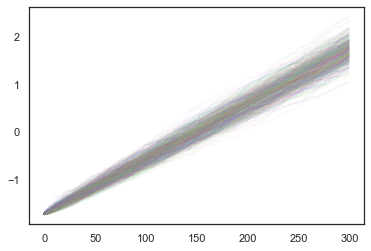

In [114]:
n = range(0,300,1)
for j in range(500):
    plt.plot(n,Z[j], alpha = 0.05)

In [115]:
m = np.arange(0,500,1)
Z[m][299]

array([-1.71568407e+00, -1.70329015e+00, -1.70011770e+00, -1.69618885e+00,
       -1.69432536e+00, -1.66438727e+00, -1.66138217e+00, -1.64459441e+00,
       -1.63027497e+00, -1.61834232e+00, -1.60539519e+00, -1.59730262e+00,
       -1.58216164e+00, -1.58109680e+00, -1.57725486e+00, -1.55430404e+00,
       -1.55115358e+00, -1.53311073e+00, -1.51390485e+00, -1.50839056e+00,
       -1.50612195e+00, -1.46855126e+00, -1.46636831e+00, -1.44772020e+00,
       -1.43657631e+00, -1.43309021e+00, -1.43118653e+00, -1.43088777e+00,
       -1.42112084e+00, -1.38000561e+00, -1.37962534e+00, -1.37775997e+00,
       -1.37758590e+00, -1.36438106e+00, -1.35755481e+00, -1.32505885e+00,
       -1.30890353e+00, -1.30266189e+00, -1.27469909e+00, -1.26970578e+00,
       -1.26887188e+00, -1.24604100e+00, -1.24456727e+00, -1.24390682e+00,
       -1.23820872e+00, -1.23811081e+00, -1.23697000e+00, -1.22957298e+00,
       -1.22676160e+00, -1.22240803e+00, -1.22007895e+00, -1.20475290e+00,
       -1.20271022e+00, -


Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду (подписи на графиках, см. семинар и туториалы).

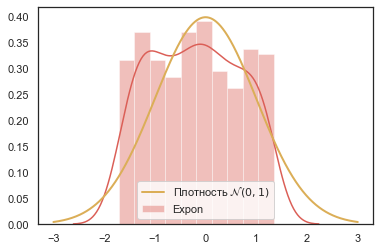

In [116]:
m = range(0,500,1)
sns.distplot(Z[m][299], bins = 10, label = 'Expon')
grid = np.linspace(-3, 3, 1000)
# считаем значения функции в выборке
norm_pdf_values = sps.norm.pdf(grid)
plt.plot(grid, norm_pdf_values, label='Плотность $\\mathcal{N}(0,1)$', lw=2)
plt.legend()







*b).* Выполните те же действия для распределения $Pois(1)$.


Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

In [117]:
from scipy.stats import poisson
mu = 1
sample2 = poisson(mu).rvs(size = (samples_count, size))
sample2

array([[2, 2, 2, ..., 1, 1, 2],
       [2, 1, 0, ..., 5, 2, 1],
       [2, 1, 3, ..., 1, 1, 0],
       ...,
       [1, 3, 2, ..., 0, 1, 1],
       [1, 0, 0, ..., 2, 1, 2],
       [1, 0, 1, ..., 0, 1, 0]])

In [118]:
Xsums2 = sample2.cumsum(axis = 1)
Xsums2

array([[  2,   4,   6, ..., 302, 303, 305],
       [  2,   3,   3, ..., 287, 289, 290],
       [  2,   3,   6, ..., 304, 305, 305],
       ...,
       [  1,   4,   6, ..., 291, 292, 293],
       [  1,   1,   1, ..., 318, 319, 321],
       [  1,   1,   2, ..., 278, 279, 279]], dtype=int32)

In [119]:
Z2 = (Xsums2 - np.mean(Xsums2))/np.sqrt(np.var(Xsums2))
Z2

array([[-1.69768673, -1.67490038, -1.65211402, ...,  1.72026649,
         1.73165967,  1.75444602],
       [-1.69768673, -1.68629356, -1.68629356, ...,  1.54936883,
         1.57215518,  1.58354836],
       [-1.69768673, -1.68629356, -1.65211402, ...,  1.74305285,
         1.75444602,  1.75444602],
       ...,
       [-1.70907991, -1.67490038, -1.65211402, ...,  1.59494154,
         1.60633472,  1.61772789],
       [-1.70907991, -1.70907991, -1.70907991, ...,  1.90255733,
         1.91395051,  1.93673686],
       [-1.70907991, -1.70907991, -1.69768673, ...,  1.44683023,
         1.45822341,  1.45822341]])

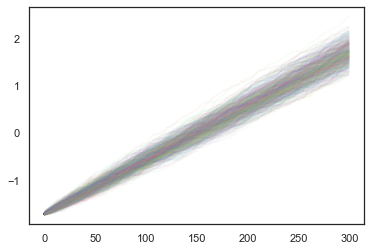

In [120]:
n = range(0,300,1)
for j in range(500):
    plt.plot(n,Z2[j], alpha = 0.05)

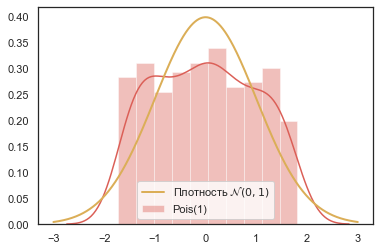

In [122]:
m = range(0,500,1)
sns.distplot(Z2[m][300], bins = 10, label = 'Pois(1)')
grid = np.linspace(-3, 3, 1000)
# считаем значения функции в выборке
norm_pdf_values = sps.norm.pdf(grid)
plt.plot(grid, norm_pdf_values, label='Плотность $\\mathcal{N}(0,1)$', lw=2)
plt.legend()

В целом это похоже на нормальное распределение отчасти.

Если продолжим увеличивать количество элементов в выборке, то будет еще ближе к нормальному распределению, думаю